# Sentiment Analysis 1

## Table of Contents:
Twitter Analysis of the Russian-Ukraine Crisis
  * Data Preprocessing
  * EDA
  * Feature Extraction
  * ML Model Predictions
  * Cross Validation
  * Evaluation

### Import Libraries

In [ ]:
# For dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing all nltk related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

# Subjectivity and Polarity
from textblob import TextBlob

# Regular Expressions
import re
import string

# Bag of Words representation
import collections
from sklearn.feature_extraction.text import CountVectorizer

# Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# To ignore warning
import warnings
warnings.filterwarnings("ignore")

# Emotion
# !pip install nrclex
from nrclex import NRCLex

# Mime type rendering
# !pip install nbformat
import nbformat

In [ ]:
# Set Pandas truncation of long strings
pd.set_option('display.max_colwidth', 1000)

### Import Data

In [ ]:
data_sentiment = pd.read_csv('datasets/ukrainerussian_tweets.csv')

### Explanation on what we are looking out for:
* What are we trying to tackle?
  *  Indulge in such a topic where we analyse the emotions of the general public as tensions
continued to arise between Russian and Ukraine supporters. Therefore, we are doing sentiment analysis on
the Ukraine-Russia War on Twitter.
* Objectives:
  * Identify the mental state of the general public based on the comments extracted from the tweets on Twitter
  * Understand how this conflict has affected the general public using sentiment analysis
  * Data Source: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated

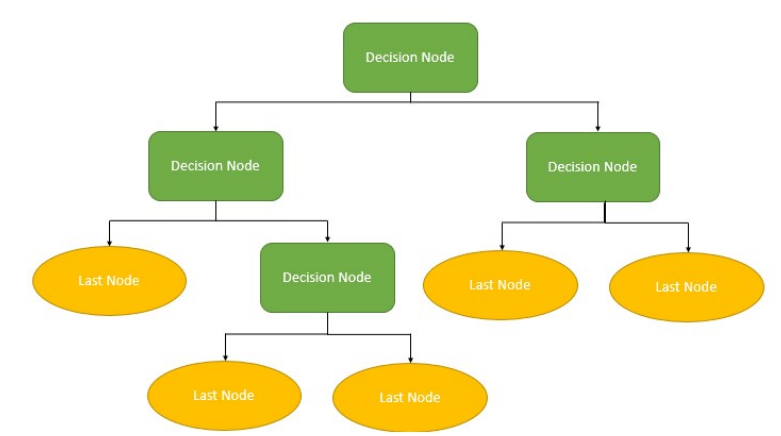


### Inspect the data & Explore Data

In [ ]:
# Retrieve all the columns within the dataframe


In [ ]:
# View the trpes of data collected in each column of the data frame


In [ ]:
# The main set of data we will be preprocessing for detecting emotions -> Tweet column


In [ ]:
# Extracting columns required to perform sentiment analysis


### EDA

In [ ]:
df_tweets.head()

### Plot a bar graph to show the distribution of the top 5 languages reflected in the twitter dataset

In [ ]:
# Printing out unique row data in the langauge column


In [ ]:
# Counting the number of each language type using value_counts() function


In [ ]:
# Choosing top 5 language


In [ ]:
# Plotting the Bar Graph
# Setting theme for the sns background
sns.set_theme(style='darkgrid')
# Plot bar graph using barplot() function
sns.barplot(x=top5_lang.index , y =top5_lang.values )

### Data Cleaning
We will now be taking the tweet data that are in english language

In [ ]:
# Setting lemmatize and stopword variable


In [ ]:
# Processing Tweet data
def tweet_processor(tweet_data):
  tweet_data = tweet_data.lower()
  # Removes any content that is in the format is "[example_text]"
  tweet_data = re.sub('\[.*?\]', '', tweet_data)
  # Remove any text that is not lowercased
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)
  return(tweet_data)

In [ ]:
# Apply the tweet_processor to the first row


In [ ]:
# # Processing Tweet data in more detail
# def tweet_processor(tweet_data):
#   # Changing all tweet texts to be lowercase
#   tweet_data = tweet_data.lower()

#   # Removing punctuation
#   tweet_data = re.sub('\[.*?\]', '', tweet_data)

#   # Removing special characters and numbers
#   tweet_data = re.sub("[^a-z\s]", "", tweet_data)

#   # Removing hashtags
#   tweet_data = re.sub("#", " ", tweet_data)

#   # Removing RT
#   tweet_data = re.sub("RT[\s]+", "", tweet_data)

#   # Removing hyperlinks
#   tweet_data = re.sub('https?://\S+|www\.\S+', '', tweet_data)

#   tweet_data = re.sub('<.*?>+', '', tweet_data)

#   tweet_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweet_data)

#   # Removing lines separated by \n
#   tweet_data = re.sub('\n', '', tweet_data)

#   # Removing usernames
#   tweet_data = re.sub('\w*\d\w*', '', tweet_data)

#   # Removing stopwords
#   tweet_data = [word for word in tweet_data.split(' ') if word not in stopword]
#   tweet_data = " ".join(tweet_data)

#   # Lemmatisation
#   tweet_data = [lemmatizer.lemmatize(word) for word in tweet_data.split(' ')]
#   tweet_data = " ".join(tweet_data)
#   # tweet_data = ",".join([str(i) for i in tweet_data])
#   return tweet_data

In [ ]:
# Copying dataframe and storing it in a new dataframe
processed_tweet_data = df_tweets.copy()

In [ ]:
# Applying the tweet_processor function created
# processed_tweet_data['Reviewed_Tweet'] = df_tweets['tweet'].apply(tweet_processor)

In [ ]:
# Displaying processed tweet data
# processed_tweet_data['Reviewed_Tweet']

### More EDA

In [ ]:
# Subjectivity of the processed data from 0 to 1, 0 means neutral/facts, 1 means personal opinion
# Create a function to get the subjectivity



In [ ]:
# Polarity of the processed data from -1 to 1, -1 means negative, 0 means neutral, 1 means positive
# Create a function to get the polarity



In [ ]:
# Creating columns to display subjectivity and polarity



In [ ]:
# processed_tweet_data

### Word Cloud

In [ ]:
# allTweets = ' '.join([tweets for tweets in processed_tweet_data['Reviewed_Tweet']])
# RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(allTweets)
# plt.imshow(RU_wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.show()

### Computing negative, neutral and positive analysis

In [ ]:
# processed_tweet_data

In [ ]:
# processed_tweet_data.info()

### Plotting Polarity and Subjectivity
Polarity of the processed data - Ranges from -1 to 1; -1 means negative, 0 means neutral, 1 means positive <br>
Subjectivity of processed data - Ranges from 0 to 1; 0 means neutral/facts, 1 means personal opinion

In [ ]:
# Creating a new dataframe sort_data to sort te polarity amd computation analysis


In [ ]:
# Plotting our scatter plot
# fig, ax = plt.subplots(figsize=(8,6))
# sns.scatterplot(x='Polarity', y='Subjectivity', hue='Computation_Analysis', data=sort_data)
# plt.show()

In [ ]:
# Creating our variables to store each column
# !pip install plotly



hist_data = [positive['length'],neutral['length'] , neg['length'] , vneg['length']]

group_labels = ['Positive', 'Neutral', 'Negative', 'Very Negative']

colors = ['black', 'red']

### Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

### Add title
fig.update_layout(title_text='Length distribution of ham and spam messages',
                 template = 'simple_white')
fig.show()

### Computing percentage of positive, neutral and negative tweets

In [ ]:
# Percentage of positive tweets




In [ ]:
# Percentage of neutral tweets




In [ ]:
# Percentage of negative tweets




In [ ]:
# Percentage of very negative tweets




### Graphical Representation of Tweet Analysis

In [ ]:
# sort_data['Computation_Analysis'].value_counts()
# plt.title('Russian vs Ukraine Sentiment Analysis')
# # plt.xlabel('General Sentiment Type')
# # plt.ylabel('Count')
# sns.countplot(x='Computation_Analysis', data=sort_data)

In [ ]:


# colors = {'mediumturquoise', 'limegreen', 'mediumpurple', 'red'}
# explode=(0.1,0.1,0.1,0.1 )




### Emotion Detection

In [ ]:
# Using a python library to determine the extent of the person's emotions(e.g. fear, anger, anticipation, ...)



In [ ]:
# Removing column with emotions and the extent in dictionaries, extracting the type of emotions from the dictionary,
# concatenating as different columns into sort_data dataframe



### Data cleaning for the new rows added

In [ ]:
# Checking for null values


### Addressing null values and irrelevant columns

In [ ]:
# Dropping irrelevant data column -> anticip


In [ ]:
# Checking the columns in sort_data


In [ ]:
# Taking care of null values in anticipation


In [ ]:
# Confirming that there are no null values


In [ ]:
# Overview of dataframe


### Measuring the Correlation between the features

In [ ]:
# Plot a correlation matrix
# corr_matrix = sort_data.corr(numeric_only=True)
# fig,ax = plt.subplots(figsize=(12,12))
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

#### Is there any correlation? What does our heatmap mean?